In [1]:
# Impoer pandas 
import pandas as pd
import numpy as np


# Import Machine Learning Module 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer
from sklearn.metrics import classification_report, confusion_matrix


# visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [4]:
# import dataset
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')

# Data Exploration

In [6]:
# Data Exploration 
def preview(df):
    print('1.Top 10 Record Data : ',df.head(10),'\n')
    print('2.Demensional Data :',df.shape,'\n')
    print('3.Descriptive of Data : ',df.describe(),'\n')
    print('4.Data Info : ',df.info(),'\n')   
    print('5.Types of dataset :',df.dtypes,'\n')
    
preview(train)

1.Top 10 Record Data :     PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, M

In [7]:
# preview of Dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# how mmany unique column that we have 
def unique_columns(df):
    for col in df.columns :
        if df[col].dtypes == 'object':
            unique_cat = len(df[col].unique())
            print("Feature '{col}' has {unique_cat} unique categories".format(col=col, unique_cat=unique_cat))
unique_columns(train)

Feature 'Name' has 891 unique categories
Feature 'Sex' has 2 unique categories
Feature 'Ticket' has 681 unique categories
Feature 'Cabin' has 148 unique categories
Feature 'Embarked' has 4 unique categories


# Data Cleaning 

In [10]:
# Check missing value 
def missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
    missing  = pd.concat([total, percent], axis=1, keys=['Total_Mising', 'Percent'])
    return missing.head(10)
print ('Missing Train :','\n',missing_value(train),'\n')
print ('Missing Test :','\n',missing_value(test))

Missing Train : 
           Total_Mising  Percent
Cabin              687    77.10
Age                177    19.87
Embarked             2     0.22
Fare                 0     0.00
Ticket               0     0.00
Parch                0     0.00
SibSp                0     0.00
Sex                  0     0.00
Name                 0     0.00
Pclass               0     0.00 

Missing Test : 
           Total_Mising  Percent
Cabin              327    78.23
Age                 86    20.57
Fare                 1     0.24
Embarked             0     0.00
Ticket               0     0.00
Parch                0     0.00
SibSp                0     0.00
Sex                  0     0.00
Name                 0     0.00
Pclass               0     0.00


## 1. Train

In [11]:
# Drop Missing Value 
#list colummns will be removed
dropcol_train = []
def Drop_Missing(df):
    threshold = 0.6
    size_df = df.shape[0]
    #looping to take the number of null of every feature 
    for col in df.columns :
        if (df[col].isnull().sum()/size_df >= threshold):
            dropcol_train.append(col)
            print('Column that will be removed : ', dropcol_train)

Drop_Missing(train)
train = train.drop(dropcol_train, axis = 1)
train.head()

Column that will be removed :  ['Cabin']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
#Seperate data types
categorical_list_train = []
numerical_list_train = []
def List_dtypes(df):
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            categorical_list_train.append(col)
        else:
            numerical_list_train.append(col)
List_dtypes(train)
print('Number of categorical features:', str(len(categorical_list_train)))
print('Number of numerical features:', str(len(numerical_list_train)))

Number of categorical features: 4
Number of numerical features: 7


In [13]:
#filling for nuerical columns 
for col in numerical_list_train:
  train[col] = train[col].fillna(train[col].median())

In [14]:
#filling for categorical columns 
for col in categorical_list_train:
  train[col] = train[col].fillna(train[col].mode().iloc[0])

In [15]:
missing_value(train)

,Total_Mising,Percent
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0
Survived,0,0.0


Jika kita lihat sudah tidak ada missing value dalam data kita 

## 2. Test

In [16]:
# Drop Missing Value 
#list colummns will be removed
dropcol_test = []
def Drop_Missing(df):
    threshold = 0.6
    size_df = df.shape[0]
    #looping to take the number of null of every feature 
    for col in df.columns :
        if (df[col].isnull().sum()/size_df >= threshold):
            dropcol_test.append(col)
            print('Column that will be removed : ', dropcol_test)

Drop_Missing(test)
test = test.drop(dropcol_test, axis = 1)
test.head()

Column that will be removed :  ['Cabin']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [17]:
#Seperate data types
categorical_list_test = []
numerical_list_test = []
def List_dtypes(df):
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            categorical_list_test.append(col)
        else:
            numerical_list_test.append(col)
List_dtypes(test)
print('Number of categorical features:', str(len(categorical_list_test)))
print('Number of numerical features:', str(len(numerical_list_test)))

Number of categorical features: 4
Number of numerical features: 6


In [18]:
#filling for nuerical columns 
for col in numerical_list_test:
  test[col] = test[col].fillna(test[col].median())

In [19]:
#filling for categorical columns 
for col in categorical_list_test:
  test[col] = test[col].fillna(test[col].mode().iloc[0])

In [20]:
missing_value(test)

,Total_Mising,Percent
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0
PassengerId,0,0.0


In [21]:
# treatment train dataset 
column =['Name','PassengerId','Ticket']
train = train.drop(column,axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
# treatment test dataset 
column =['Name','PassengerId','Ticket',]
test = test.drop(column,axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


# Feature Engineering 

## 1. Train 

In [23]:
# Binning numerical columns
# q=4 means 4 quantiles 0, 1, 2, 3
# labels=False are numbers, not characters
train['CatAge'] = pd.qcut(train.Age, q=4, labels=False )
train['CatFare']= pd.qcut(train.Fare, q=4, labels=False)
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CatAge,CatFare
0,0,3,male,22.0,1,0,7.2500,S,0,0
1,1,1,female,38.0,1,0,71.2833,C,3,3
2,1,3,female,26.0,0,0,7.9250,S,1,1
3,1,1,female,35.0,1,0,53.1000,S,2,3
4,0,3,male,35.0,0,0,8.0500,S,2,1


In [24]:
# Create column of number of Family members onboard
train['Fam_Size'] = train.Parch + train.SibSp

# Drop columns
train = train.drop(['SibSp','Parch'], axis=1)
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,CatAge,CatFare,Fam_Size
0,0,3,male,22.0,7.2500,S,0,0,1
1,1,1,female,38.0,71.2833,C,3,3,1
2,1,3,female,26.0,7.9250,S,1,1,0
3,1,1,female,35.0,53.1000,S,2,3,1
4,0,3,male,35.0,8.0500,S,2,1,0


In [25]:
# get dummies from the data 
train = pd.get_dummies(train, drop_first=True)
train.head(5)

,Survived,Pclass,Age,Fare,CatAge,CatFare,Fam_Size,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,0,1,1,0,1
1,1,1,38.0,71.2833,3,3,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,0,1
3,1,1,35.0,53.1000,2,3,1,0,0,1
4,0,3,35.0,8.0500,2,1,0,1,0,1


In [26]:
train.shape

(891, 10)

# 2. Test

In [27]:
# Binning numerical columns
# q=4 means 4 quantiles 0, 1, 2, 3
# labels=False are numbers, not characters
test['CatAge'] = pd.qcut(test.Age, q=4, labels=False )
test['CatFare']= pd.qcut(test.Fare, q=4, labels=False)
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CatAge,CatFare
0,3,male,34.5,0,0,7.8292,Q,2,0
1,3,female,47.0,1,0,7.0000,S,3,0
2,2,male,62.0,0,0,9.6875,Q,3,1
3,3,male,27.0,0,0,8.6625,S,1,1
4,3,female,22.0,1,1,12.2875,S,0,1


In [28]:
# Create column of number of Family members onboard
test['Fam_Size'] = test.Parch + test.SibSp

# Drop columns
test = test.drop(['SibSp','Parch'], axis=1)
test.head(5)

,Pclass,Sex,Age,Fare,Embarked,CatAge,CatFare,Fam_Size
0,3,male,34.5,7.8292,Q,2,0,0
1,3,female,47.0,7.0000,S,3,0,1
2,2,male,62.0,9.6875,Q,3,1,0
3,3,male,27.0,8.6625,S,1,1,0
4,3,female,22.0,12.2875,S,0,1,2


In [29]:
# get dummies from the data 
test = pd.get_dummies(test, drop_first=True)
test.head(5)

,Pclass,Age,Fare,CatAge,CatFare,Fam_Size,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,7.8292,2,0,0,1,1,0
1,3,47.0,7.0000,3,0,1,0,0,1
2,2,62.0,9.6875,3,1,0,1,1,0
3,3,27.0,8.6625,1,1,0,1,0,1
4,3,22.0,12.2875,0,1,2,0,0,1


In [30]:
test.shape

(418, 9)

# Train Test Split

In [31]:
X = train.drop(['Survived'],axis = 1) 
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

## 1. Decision tree

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)
dt_acc_train = round(accuracy_score(y_train,dt_pred_train)*100,2)
dt_acc_test = round(accuracy_score(y_test,dt_pred_test)*100,2)

## 2. Random Forest

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)
rf_acc_train = round(accuracy_score(y_train,rf_pred_train)*100,2)
rf_acc_test = round(accuracy_score(y_test,rf_pred_test)*100,2)

c:\users\triano nurhikmat\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 3. Adaboost

In [34]:
ad = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators= 500)
ad.fit(X_train,y_train)
ad_pred_train = ad.predict(X_train)
ad_pred_test = ad.predict(X_test)
ad_acc_train = round(accuracy_score(y_train,ad_pred_train)*100,2)
ad_acc_test = round(accuracy_score(y_test,ad_pred_test)*100,2)

## 4. Bagging 

In [35]:
bg = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 500)
bg.fit(X_train,y_train)
bg_pred_train = bg.predict(X_train)
bg_pred_test = bg.predict(X_test)
bg_acc_train = round(accuracy_score(y_train,bg_pred_train)*100,2)
bg_acc_test = round(accuracy_score(y_test,bg_pred_test)*100,2)

## 5. Gradient Boosting 

In [36]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators= 500)
gb.fit(X_train,y_train)
gb_pred_train = gb.predict(X_train)
gb_pred_test = gb.predict(X_test)
gb_acc_train = round(accuracy_score(y_train,gb_pred_train)*100,2)
gb_acc_test = round(accuracy_score(y_test,gb_pred_test)*100,2)

# Result comparison between every Classifier

In [37]:
# Result train
results_train = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Adaboost', 
              'Bagging', 'Gradient Boosting'],
    'Accuracy': [dt_acc_train,rf_acc_train,ad_acc_train,
                bg_acc_train,gb_acc_train]})
result_train_df = results_train.sort_values(by='Accuracy', ascending=False)
result_train_df = result_train_df.set_index('Model')
result_train_df.head(5)

,Accuracy
Model,
Decision Tree,98.17
Adaboost,98.17
Bagging,98.17
Random Forest,96.35
Gradient Boosting,95.79


In [38]:
# Result test
results_test = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Adaboost', 
              'Bagging', 'Gradient Boosting'],
    'Accuracy': [dt_acc_test,rf_acc_test,ad_acc_test,
                bg_acc_test,gb_acc_test]})
result_test_df = results_test.sort_values(by='Accuracy', ascending=False)
result_test_df = result_test_df.set_index('Model')
result_test_df.head(5)

,Accuracy
Model,
Gradient Boosting,87.15
Bagging,83.24
Random Forest,82.12
Decision Tree,80.45
Adaboost,79.89


In [51]:
# The Best model formed to ROC AUC curve 

# Make Function ROC CURVE 
def ROC_CURVE(feature, target, model):
    '''
    Documentation :
    ---------------
    features : The feaures of test  
    target   : target 
    model    : the best model that have been created 
    
    '''
    #Value of AUC 
    probs = model.predict_proba(feature)
    probs = probs[:, 1]
    auc = roc_auc_score(target, probs)
    fpr, tpr, thresholds = roc_curve(target, probs)
    
    # plot the roc curve for the model
    plt.figure(figsize=(12,8))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, color='red',label = 'AUC = %0.2f' % auc)
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right')

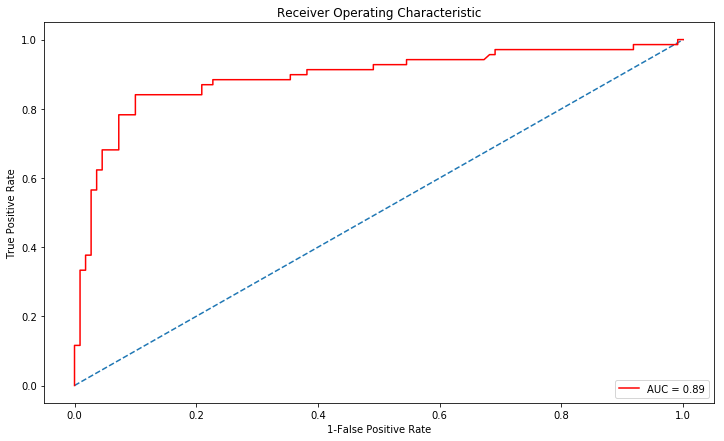

In [50]:
#visualization 
ROC_CURVE(X_test,y_test,gb)

In [200]:
pred=gb.predict(test)
pd.DataFrame(pred, columns=['predict']).to_csv('model.csv')